# Weather Data — Data Mining Notebook
**Dataset:** prasad22 / Weather Data (synthetic, multi-city (contains major big cities), only has 5 months worth of data from 2024-01 to 2024-05)  
**Goal:** Clean, explore, and visualize temperature, humidity, precipitation, and wind across cities.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_csv('/Users/calvi/Downloads/weather_data.csv')

In [2]:
df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [3]:
#Checking the data types of each column
df.dtypes

Location             object
Date_Time            object
Temperature_C       float64
Humidity_pct        float64
Precipitation_mm    float64
Wind_Speed_kmh      float64
dtype: object

In [4]:
#Making year, month, day, date columns from datetime column
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')
df = df.sort_values('Date_Time').reset_index(drop=True)
df["Year"] = df['Date_Time'].dt.year
df["Month"] = df['Date_Time'].dt.month
df["Day"] = df['Date_Time'].dt.day
df["Date"] = df['Date_Time'].dt.date
df.dtypes

Location                    object
Date_Time           datetime64[ns]
Temperature_C              float64
Humidity_pct               float64
Precipitation_mm           float64
Wind_Speed_kmh             float64
Year                         int32
Month                        int32
Day                          int32
Date                        object
dtype: object

In [5]:
#checking number of rows, columns as well as what exactly each column is
df
print("Shape:", df.shape)
print("Columns:", list(df.columns))

#checking for any nulls
nulls = df.isna().sum().sort_values(ascending=False)
nulls

Shape: (1000000, 10)
Columns: ['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh', 'Year', 'Month', 'Day', 'Date']


Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
Year                0
Month               0
Day                 0
Date                0
dtype: int64

In [6]:
loc_counts = df["Location"].value_counts()
display(loc_counts)
#want to check min and max dates as well as what locations this df has
df["Date"].min(), df["Date"].max()

Location
Phoenix         100209
Chicago         100164
Philadelphia    100122
Houston         100076
New York         99972
San Antonio      99962
Dallas           99936
Los Angeles      99922
San Jose         99863
San Diego        99774
Name: count, dtype: int64

(datetime.date(2024, 1, 1), datetime.date(2024, 5, 18))

In [7]:
#changing temperature into F (I'm american so I like F)
df["Temperature_F"] = (df["Temperature_C"] * 9/5) + 32

In [8]:
df['Temperature_F']

0          33.113448
1         103.045038
2          96.657099
3          89.686754
4          17.437528
             ...    
999995     29.189995
999996     47.476341
999997     45.823790
999998     93.268900
999999    100.892830
Name: Temperature_F, Length: 1000000, dtype: float64

In [19]:
#basically grouping the data by location and some descriptive stats like mean,std,min,median
num_cols = ["Temperature_F", "Humidity_pct", "Precipitation_mm", "Wind_Speed_kmh"]
metrics = [c for c in num_cols if c in df.columns]

summary_by_loc = df.groupby("Location")[metrics].agg(["count","mean","std","min","median","max"]).round(2)
summary_by_loc.head(10)

Temperature_F                                    Humidity_pct  \
                     count   mean    std    min median    max        count   
Location                                                                     
Chicago             100164  59.02  26.00  14.00  59.01  104.0       100164   
Dallas               99936  59.02  26.03  14.00  59.09  104.0        99936   
Houston             100076  58.90  25.99  14.00  58.93  104.0       100076   
Los Angeles          99922  59.15  26.06  14.00  59.12  104.0        99922   
New York             99972  59.02  25.94  14.00  58.98  104.0        99972   
Philadelphia        100122  59.06  25.94  14.00  59.15  104.0       100122   
Phoenix             100209  55.03  26.58  -3.94  54.97  104.0       100209   
San Antonio          99962  59.05  25.99  14.00  59.20  104.0        99962   
San Diego            99774  58.88  25.98  14.00  58.71  104.0        99774   
San Jose             99863  58.92  25.90  14.00  58.95  104.0        99863   

                                  ... Precipitation_mm                     \
               mean    std   min  ...              std  min median    max   
Location                          ...                                       
Chicago       60.09  17.34  30.0  ...             2.89  0.0   5.00  10.00   
Dallas        59.96  17.35  30.0  ...             2.88  0.0   5.00  10.00   
Houston       59.97  17.36  30.0  ...             2.89  0.0   5.00  10.00   
Los Angeles   60.07  17.31  30.0  ...             2.89  0.0   5.00  10.00   
New York      60.04  17.33  30.0  ...             2.89  0.0   4.99  10.00   
Philadelphia  60.04  17.27  30.0  ...             2.90  0.0   5.03  10.00   
Phoenix       60.05  17.33  30.0  ...             3.28  0.0   6.09  14.97   
San Antonio   59.93  17.33  30.0  ...             2.89  0.0   5.00  10.00   
San Diego     60.07  17.29  30.0  ...             2.89  0.0   5.01  10.00   
San Jose      59.99  17.34  30.0  ...             2.89  0.0   4.99  10.00   

             Wind_Speed_kmh                                 
                      count   mean   std  min median   max  
Location                                                    
Chicago              100164  15.00  8.67  0.0  14.97  30.0  
Dallas                99936  15.02  8.65  0.0  15.07  30.0  
Houston              100076  14.99  8.66  0.0  15.00  30.0  
Los Angeles           99922  15.04  8.68  0.0  15.02  30.0  
New York              99972  14.99  8.67  0.0  14.98  30.0  
Philadelphia         100122  14.99  8.65  0.0  14.97  30.0  
Phoenix              100209  14.98  8.67  0.0  14.96  30.0  
San Antonio           99962  14.96  8.67  0.0  14.93  30.0  
San Diego             99774  15.04  8.69  0.0  15.07  30.0  
San Jose              99863  14.97  8.65  0.0  14.97  30.0  

[10 rows x 24 columns]

In [20]:
#Monthly averages for each location

monthly = (df
           .groupby(["Location", "Year", "Month"])[metrics]
           .mean()
           .reset_index())

monthly.head(10)

,Location,Year,Month,Temperature_F,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,Chicago,2024,1,58.745389,59.985599,5.012197,15.008815
1,Chicago,2024,2,59.208446,60.000772,4.981658,14.963082
2,Chicago,2024,3,59.137758,60.209846,5.028194,15.064735
3,Chicago,2024,4,59.157050,60.032718,4.974263,14.994010
4,Chicago,2024,5,58.734372,60.290724,5.026805,14.938686
5,Dallas,2024,1,58.887186,59.931464,5.010933,14.967478
6,Dallas,2024,2,58.964683,60.089645,4.984470,15.029465
7,Dallas,2024,3,58.699490,59.932452,4.960938,15.066807
8,Dallas,2024,4,59.280519,59.856324,5.042180,15.064966
9,Dallas,2024,5,59.432356,60.017557,4.984190,14.954453


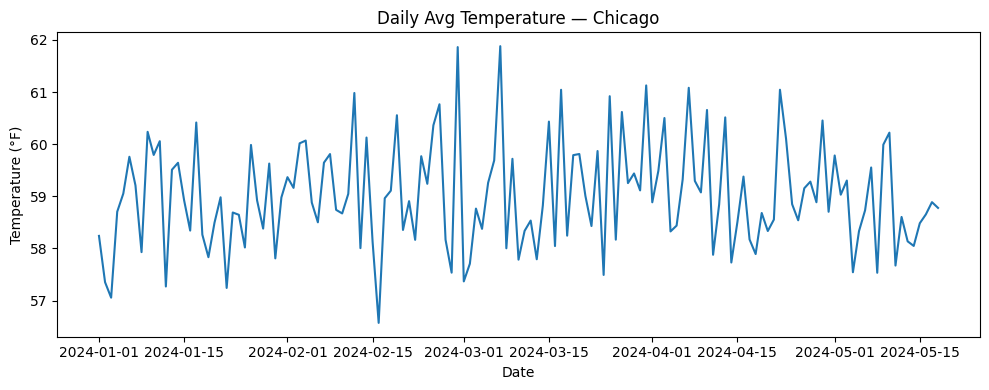

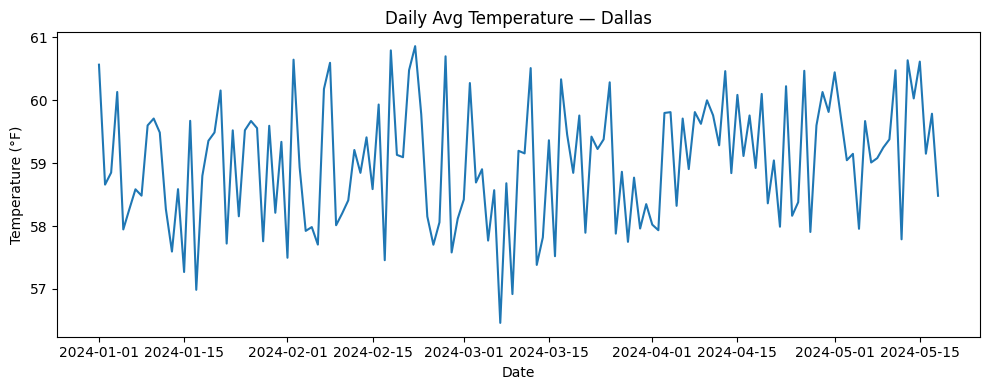

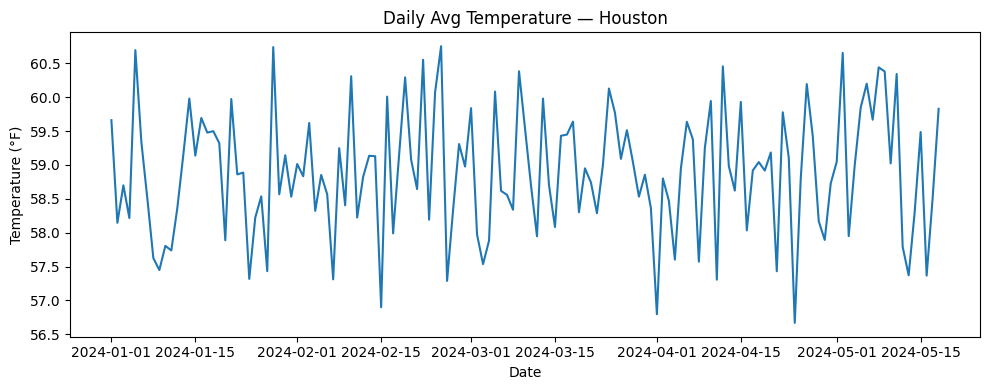

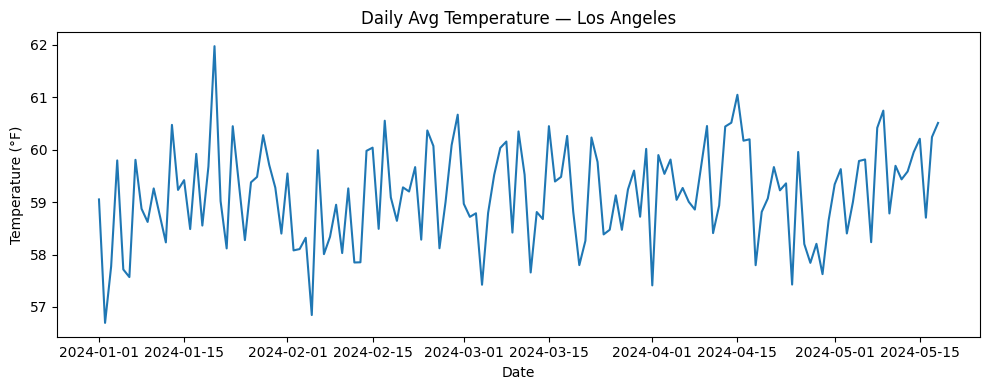

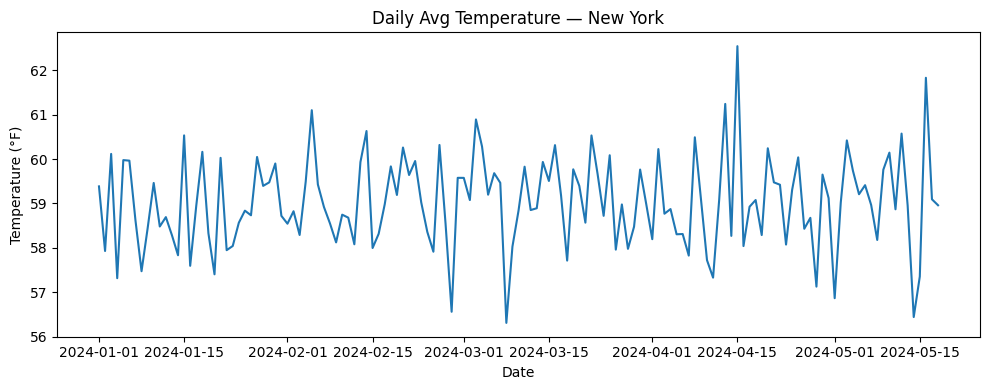

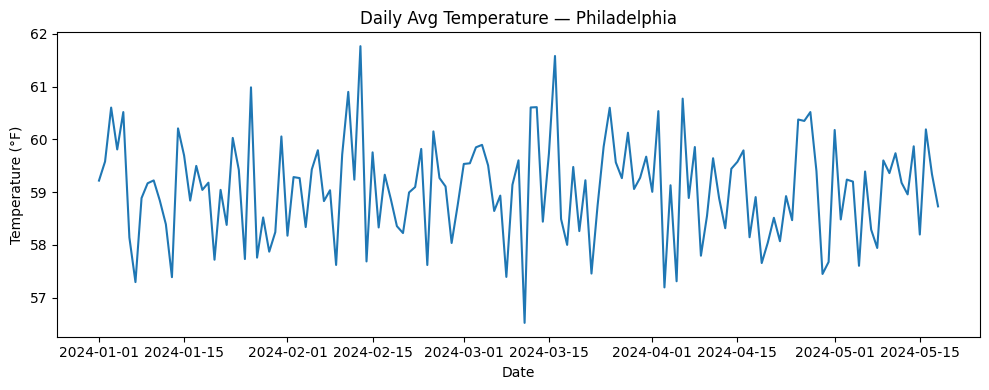

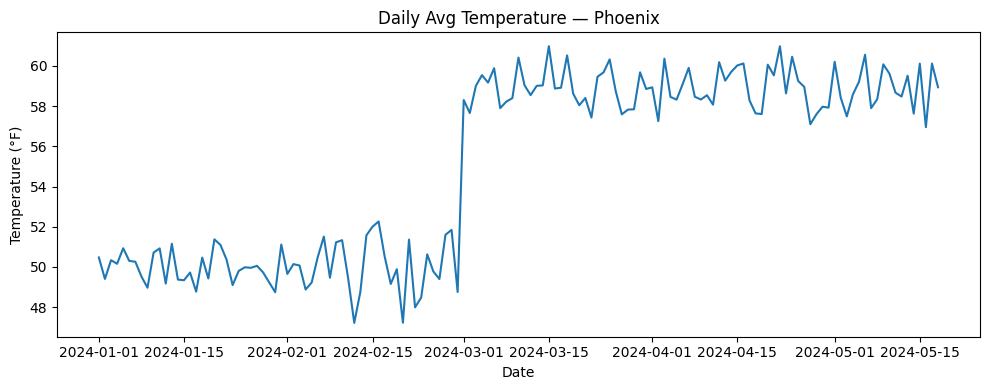

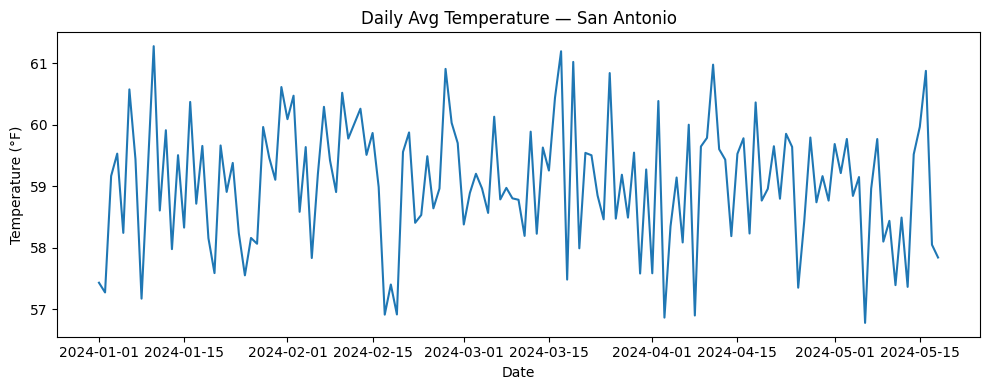

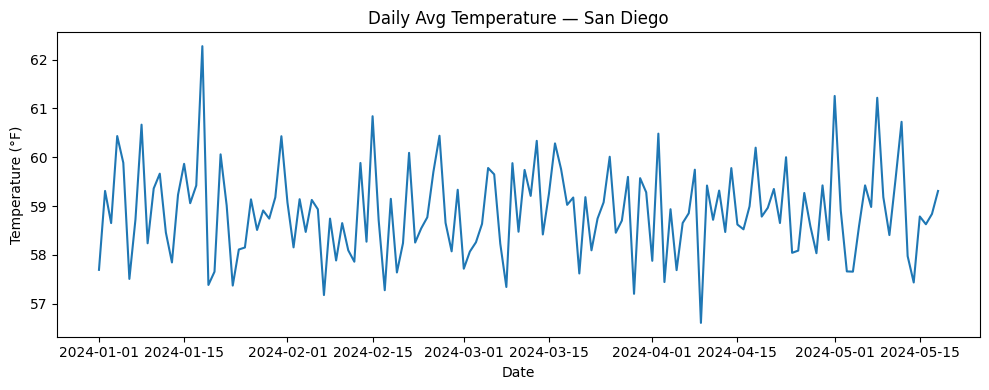

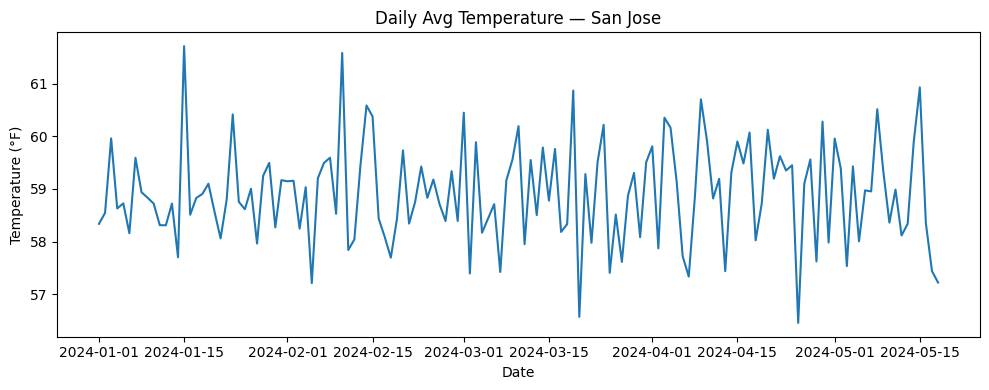

In [9]:
#plotting daily average temperature for each location, kind of restricting with only 5 months of data but wanted to see anyway
daily_temp = (df
              .groupby(["Location", "Date"])["Temperature_F"]
              .mean()
              .reset_index())

for loc in daily_temp["Location"].unique():
    subset = daily_temp[daily_temp["Location"] == loc]
    plt.figure(figsize=(10,4))
    plt.plot(subset["Date"], subset["Temperature_F"])
    plt.title(f"Daily Avg Temperature — {loc}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°F)")
    plt.tight_layout()
    plt.show()


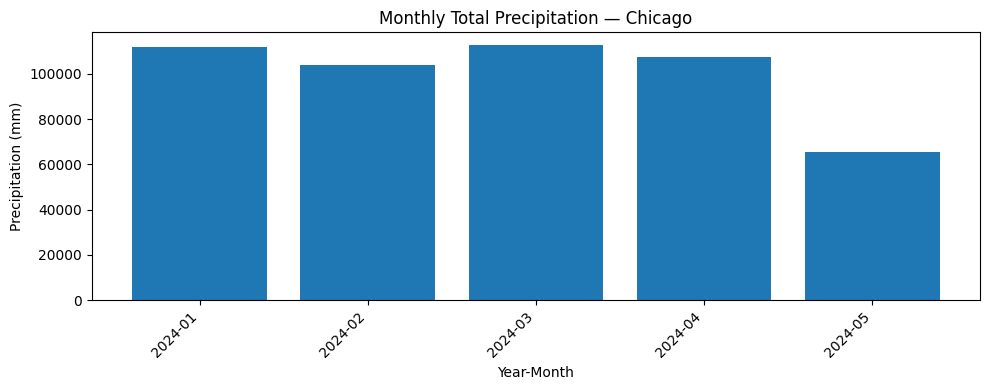

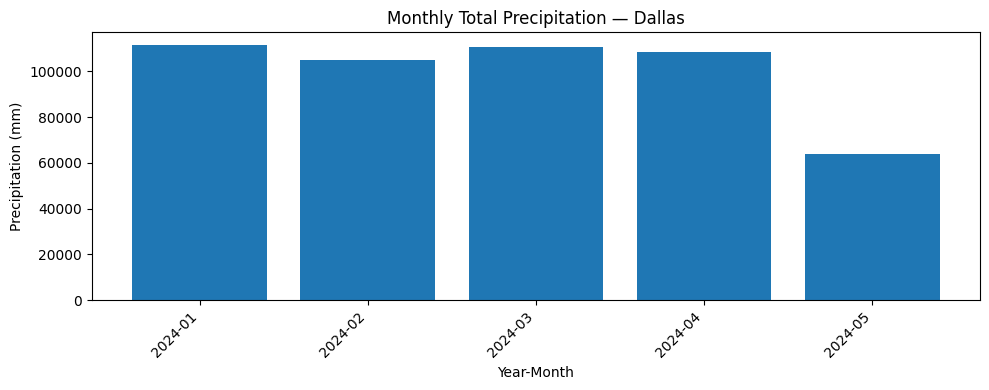

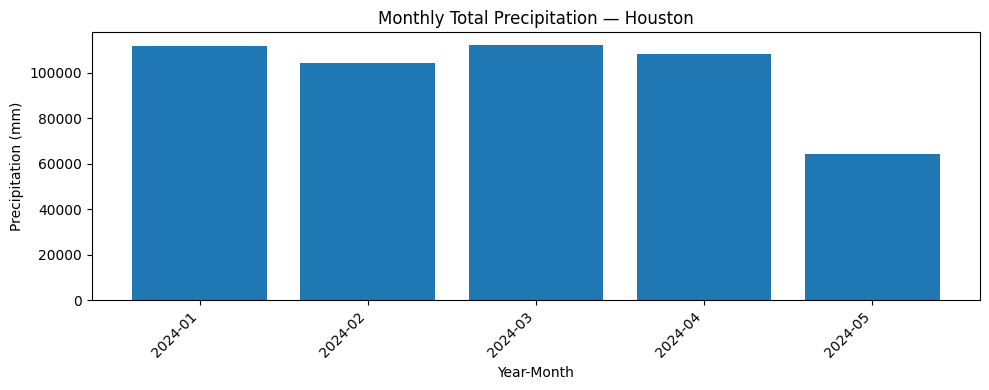

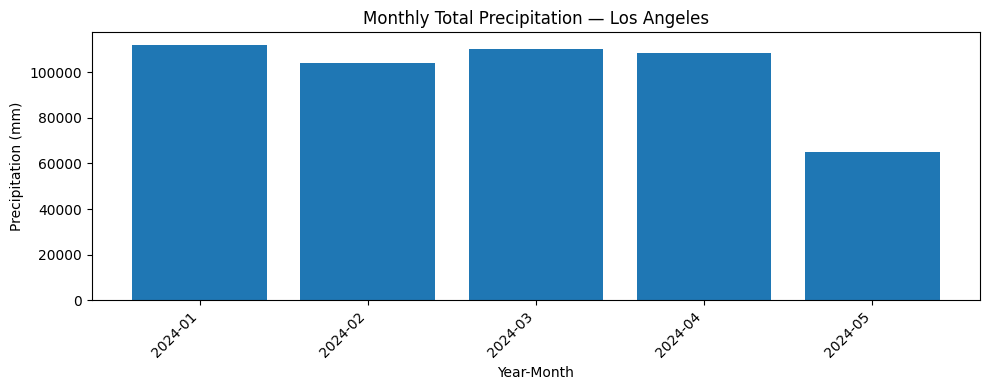

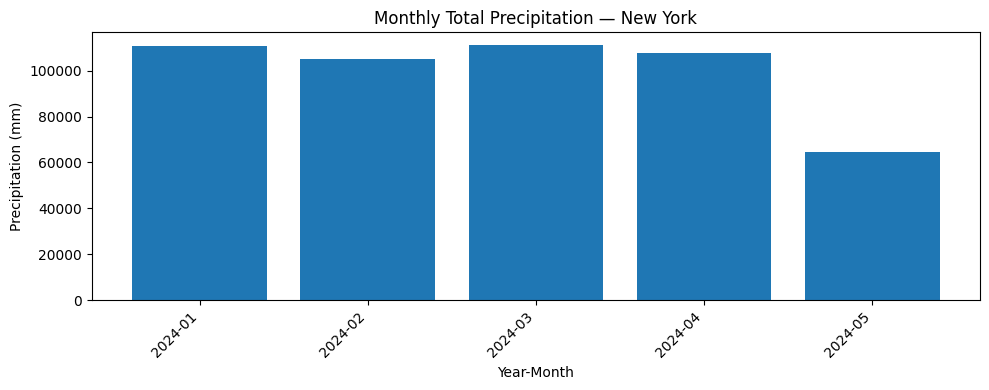

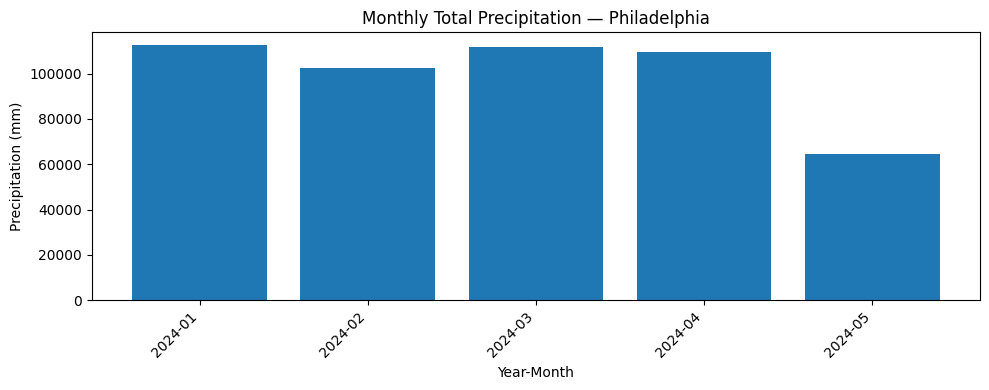

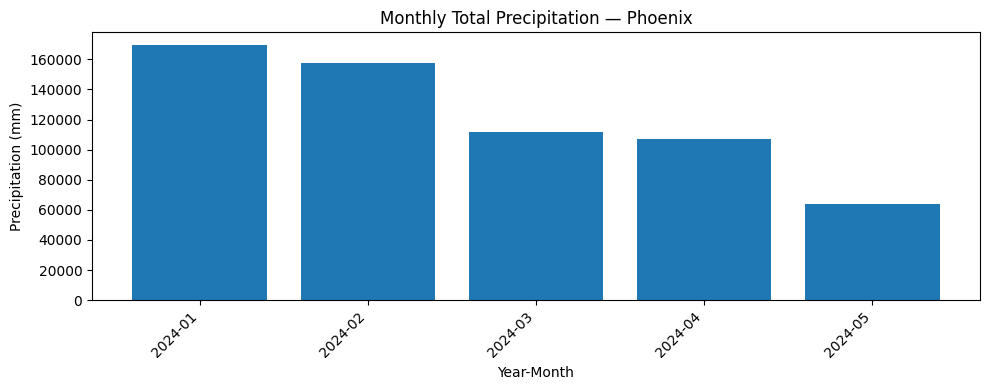

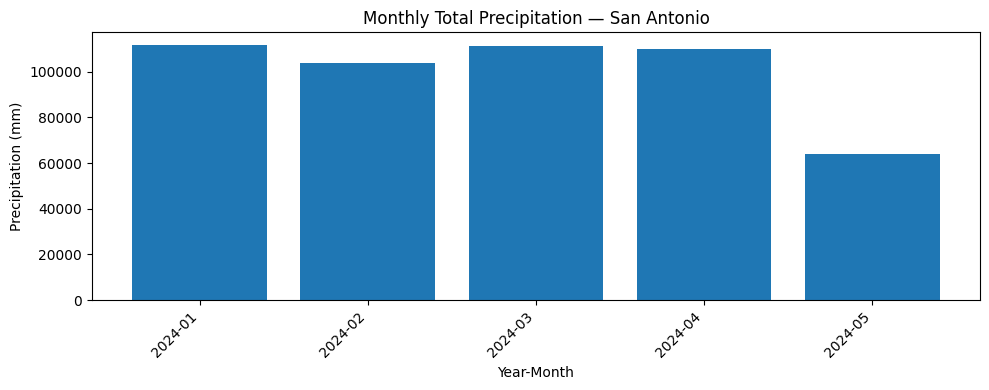

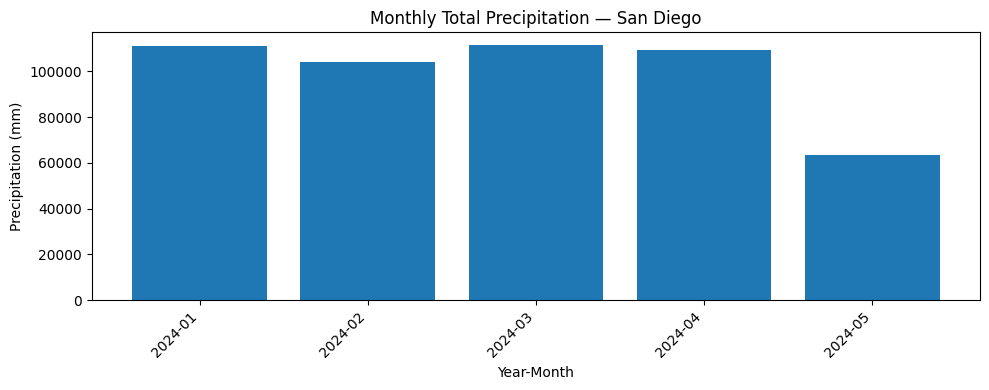

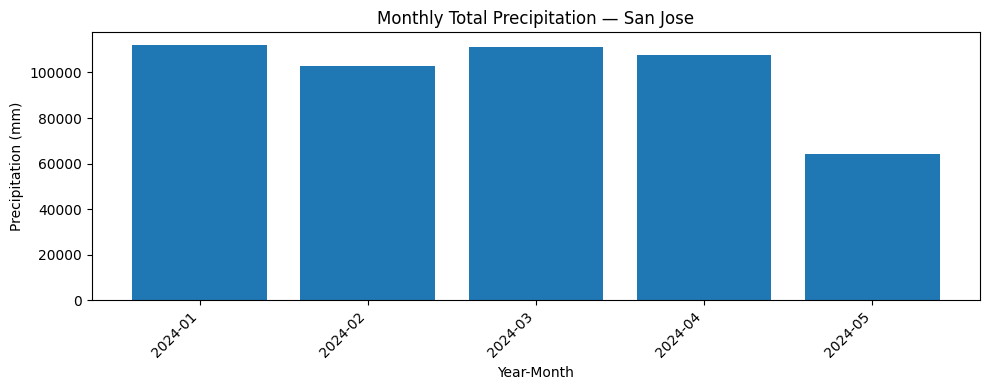

In [13]:
#showing monthly prec. for each location
monthly_p = (df
             .groupby(["Location", "Year", "Month"])["Precipitation_mm"]
             .sum()
             .reset_index())

for loc in monthly_p["Location"].unique():
    subset = monthly_p[monthly_p["Location"] == loc]
    x = subset.apply(lambda r: f"{int(r['Year'])}-{int(r['Month']):02d}", axis=1)
    
    plt.figure(figsize=(10,4))
    plt.bar(x, subset["Precipitation_mm"])
    plt.title(f"Monthly Total Precipitation — {loc}")
    plt.xlabel("Year-Month")
    plt.ylabel("Precipitation (mm)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


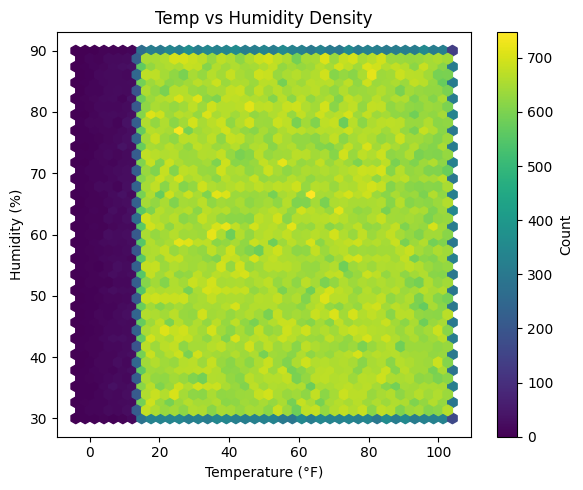

In [24]:
plt.figure(figsize=(6,5))
plt.hexbin(df["Temperature_F"], df["Humidity_pct"], gridsize=40, cmap="viridis")
plt.colorbar(label="Count")
plt.title("Temp vs Humidity Density")
plt.xlabel("Temperature (°F)")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.show()

# Project 1: Weather Data Exploration

## Introduce the Problem
For this project I wanted to explore weather patterns across different cities. My guiding questions were simple:

- How do temperatures vary daily across locations?  
- How does precipitation accumulate month by month in each city?  
- What is the relationship between temperature and humidity?  

These questions are straightforward, but they help me practice summarizing and visualizing temporal data.

---

## Introduce the Data
I used the **Weather Data** dataset on Kaggle. It contains **synthetic weather data** for multiple U.S. cities. The dataset has the following features:

- **Location**: the city where the weather was recorded  
- **Date_Time**: timestamp of the measurement  
- **Temperature_C**: temperature in Celsius  
- **Humidity_pct**: relative humidity in percent  
- **Precipitation_mm**: precipitation in millimeters  
- **Wind_Speed_kmh**: wind speed in kilometers per hour  

---

## Pre-processing the Data
Before analyzing, I did a few basic steps:

1. Parsed the datetime column so I could group by day and month.  
2. Standardized column names (underscores instead of spaces).  
3. Dropped missing rows for critical fields (date/location).  
4. Clipped invalid values like negative precipitation or humidity outside 0–100.  

These steps make the data easier to group and plot without errors.

---

## Data Understanding and Visualization
I focused on three main views:

### 1. Daily Average Temperature by City
- Shows how each city’s temperature changes over time.  
- Clear seasonal cycles are visible, with colder winters and warmer summers.  

### 2. Monthly Total Precipitation by City
- Summed precipitation per month for each location.  
- Some cities show heavy spikes in certain months, while others are relatively dry.  

### 3. Hexbin Plot of Temperature vs Humidity
- Instead of a scatter with too many points, I used a **hexbin density plot**.  
- This shows where most values cluster (moderate temps, moderate humidity) and highlights extremes (very hot/dry or hot/humid cases).  

---

## Storytelling
From these visuals I learned that:

- Temperature patterns are strongly seasonal and similar across cities, but the exact ranges differ (e.g., some locations peak hotter).  
- Precipitation totals are unevenly distributed, suggesting city-level differences in climate or simulated rainfall patterns.  
- Temperature vs humidity has an inverse trend: high temperatures usually coincide with lower humidity, and cooler temps align with higher humidity.  

These patterns lined up with my initial questions and gave me a clearer sense of how to summarize time-series weather data.

---

## Impact
The impact of this kind of project is more about **practice and communication** than policy. Since the dataset is synthetic, it can’t be used for real climate conclusions. But the methods here are the same ones you’d apply to real weather records.  

Potential harm would be if someone misinterpreted the data as actual observed climate. What’s missing are other climate factors like pressure, cloud cover, or wind direction.

---

## References
- Dataset: [Kaggle – prasad22 Weather Data](https://www.kaggle.com/datasets/prasad22/weather-data)  
- Python libraries: *pandas, matplotlib*
